# Plotting a Graph

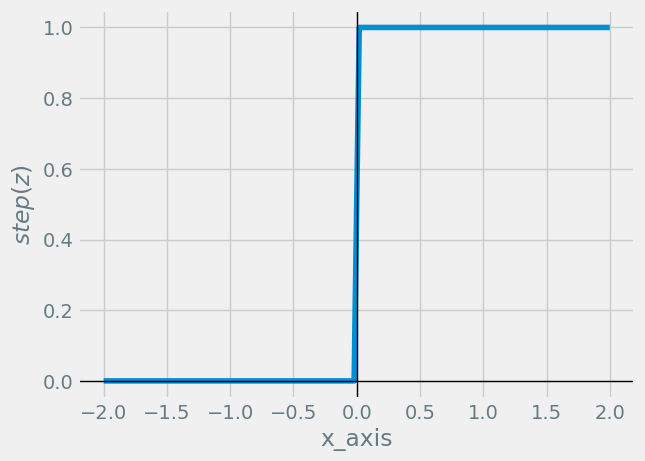

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
x_axis = np.linspace(-2,2,100)  # generate 100 numbers between -2 and 2
step = np.where(x_axis < 0, 0, 1)
plt.plot(x_axis, step)
plt.xlabel("x_axis")
plt.ylabel(r"$step(z)$")
plt.axhline(0, color='k', lw=1);
plt.axvline(0, color='k', lw=1);

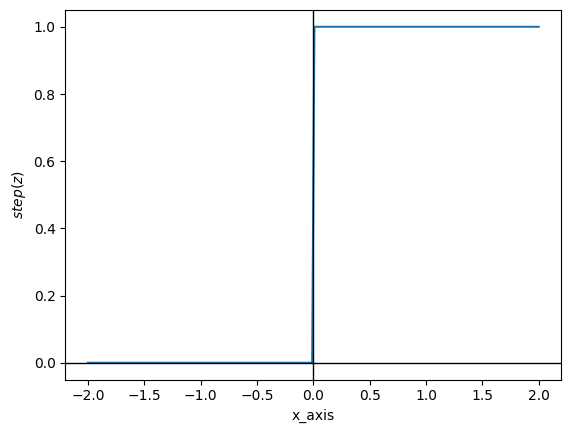

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
x_axis = np.linspace(-2,2,200)
step = np.where(x_axis < 0, 0, 1)
plt.plot(x_axis, step)
plt.xlabel("x_axis")
plt.ylabel(r"$step(z)$")
plt.axhline(0, color='k', lw=1);
plt.axvline(0, color='k', lw=1);

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


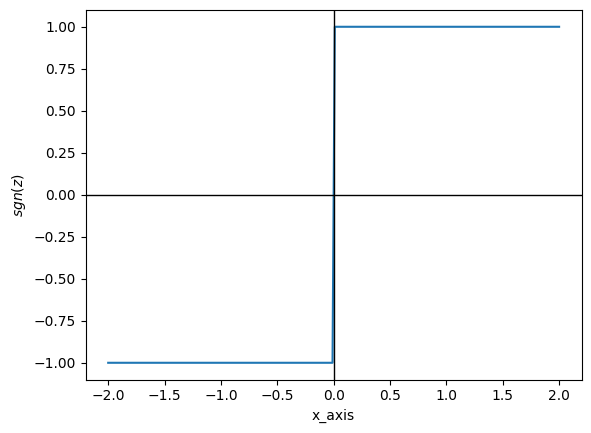

In [2]:
def sgn(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    return 0
print(x_axis)
sgn = np.array(list(map(sgn, x_axis)))
print(sgn)
plt.plot(x_axis, sgn)
plt.xlabel("x_axis")
plt.ylabel(r"$sgn(z)$")
plt.axhline(0, color='k', lw=1);
plt.axvline(0, color='k', lw=1);

In [ ]:
s = ['1', '2', '3', '4']
res = map(int, s)
print(list(res))

[1, 2, 3, 4]


# Perceptron Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

In [3]:
class Perceptron:
    def __init__(self, eta, epochs): #eta - denotes the learning rate, and can be set to a small value (say, 0.1 to 0.5).
        self.weights = np.random.randn(3) * 1e-4
        print(f"self.weights: {self.weights}")
        self.eta = eta
        self.epochs = epochs
    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights)
        print("Dot Product of input and weights: ", z)
        return np.where(z > 0 , 1, 0)
    def fit(self, X, y):
        self.X = X
        self.y = y
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # c_ = used for concatination of two arrays
        print(f"X_with_bias: \n{X_with_bias}")
        for epoch in range(self.epochs):
            print(f"for epoch: {epoch}")
            y_hat = self.activationFunction(X_with_bias, self.weights)
            print(f"predicted value: \n{y_hat}")
            error = self.y - y_hat
            print(f"error: \n{error}")
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print(f"updated weights: \n{self.weights}")
            print("#############\n")
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
        return self.activationFunction(X_with_bias, self.weights)

# AND Operation

In [4]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [6]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [7]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X, y)

self.weights: [5.72832093e-05 8.57557139e-05 7.42138661e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
Dot Product of input and weights:  [-7.42138661e-05  1.15418478e-05 -1.69306569e-05  6.88250570e-05]
predicted value: 
[0 1 0 1]
error: 
0    0
1   -1
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 5.72832093e-05 -4.99914244e-01  5.00074214e-01]
#############

for epoch: 1
Dot Product of input and weights:  [-0.50007421 -0.99998846 -0.50001693 -0.99993117]
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[5.00057283e-01 8.57557139e-05 7.42138661e-05]
#############

for epoch: 2
Dot Product of input and weights:  [-7.42138661e-05  1.15418478e-05  4.99983069e-01  5.00068825e-01]
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[ 5.72832093e-05 -4.99914244e-01  1.00007421e+00]
#############

for epoch: 3
Dot Product of input 

In [8]:
model.predict(X)

Dot Product of input and weights:  [-5.00074214e-01 -4.99988458e-01 -1.69306569e-05  6.88250570e-05]


array([0, 0, 0, 1])

In [9]:
model.weights

array([5.00057283e-01, 8.57557139e-05, 5.00074214e-01])

# Saving and Loading Model

In [10]:
import os
# saving model
dir_ = "Perceptron_model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

['Perceptron_model/AND_model.model']

In [11]:
# load the model from drive
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

Dot Product of input and weights:  [-5.00074214e-01 -4.99988458e-01 -1.69306569e-05  6.88250570e-05]
[0 0 0 1]


# OR Operation

In [12]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [13]:
X = OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [14]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [15]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [-0.00022039  0.00025401  0.00021674]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
Dot Product of input and weights:  [-2.16738093e-04  3.72711450e-05 -4.37132365e-04 -1.83123127e-04]
predicted value: 
[0 1 0 0]
error: 
0    0
1    0
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 0.99977961  0.50025401 -0.99978326]
#############

for epoch: 1
Dot Product of input and weights:  [0.99978326 1.50003727 1.99956287 2.49981688]
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 0.99977961  0.50025401 -0.49978326]
#############

for epoch: 2
Dot Product of input and weights:  [0.49978326 1.00003727 1.49956287 1.99981688]
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[9.99779606e-01 5.00254009e-01 2.16738093e-04]
#############

for epoch: 3
Dot Product of input and weights:  [-2.16738093e-04  5.00037271e-01  9.9956286

# XOR Operation:

In [16]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}
XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [17]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping across column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [18]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [19]:
model = Perceptron(eta = 0.5, epochs=50)
model.fit(X,y)

self.weights: [ 1.20379389e-04  7.64183414e-05 -5.40294926e-06]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
Dot Product of input and weights:  [5.40294926e-06 8.18212907e-05 1.25782338e-04 2.02200679e-04]
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.49987962 -0.49992358  0.9999946 ]
#############

for epoch: 1
Dot Product of input and weights:  [-0.9999946  -1.49991818 -1.49987422 -1.9997978 ]
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 1.20379389e-04  7.64183414e-05 -5.40294926e-06]
#############

for epoch: 2
Dot Product of input and weights:  [5.40294926e-06 8.18212907e-05 1.25782338e-04 2.02200679e-04]
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-0.49987962 -0.49992358  0.9999946 ]
#############

for epoch: 3
Dot Product of input and weights:  [-0.9999946 